# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

kr3 = pd.read_csv("/content/kr3_filtered_utf8.csv")
sent = pd.read_csv("/content/kr3_sentence_label(add).csv")

## 1. KR3 (공개 데이터셋, 리뷰 단위 라벨링)

In [2]:
kr3.head()
kr3.info()
kr3.describe(include="all")

kr3["Rating"].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641388 entries, 0 to 641387
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  641388 non-null  int64 
 1   Review  641388 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.8+ MB


,proportion
Rating,
1,0.604823
2,0.284915
0,0.110262


In [3]:
kr3["review_len"] = kr3["Review"].astype(str).str.len()
kr3["review_len"].describe()

,review_len
count,641388.000000
mean,127.489028
std,178.394898
min,1.000000
25%,35.000000
50%,67.000000
75%,149.000000
max,3971.000000


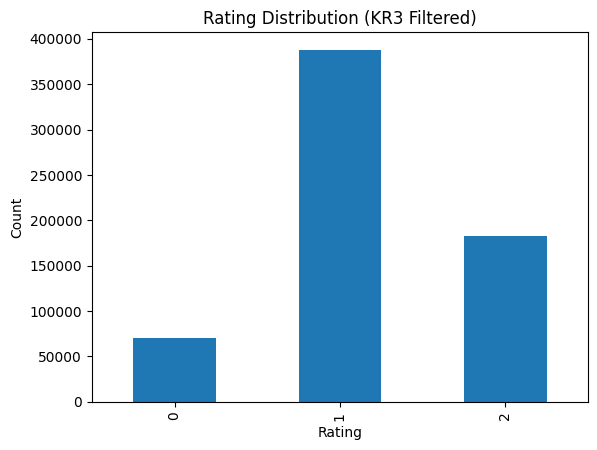

In [4]:
kr3["Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Rating Distribution (KR3 Filtered)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

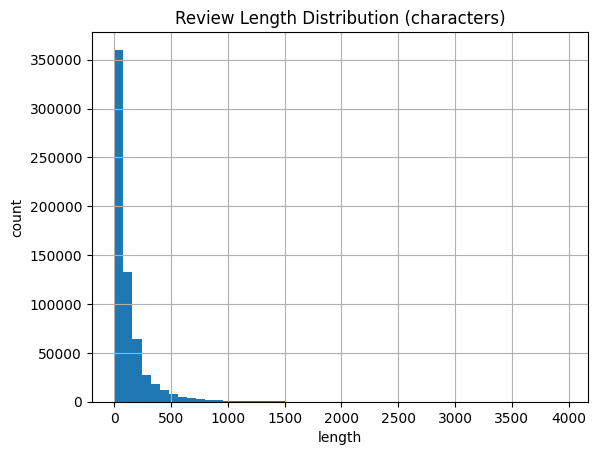

In [5]:
kr3["review_len"].hist(bins=50)
plt.title("Review Length Distribution (characters)")
plt.xlabel("length")
plt.ylabel("count")
plt.show()

## 2. KR3_sentence_label (직접 라벨링, 문자 단위 라벨링)

In [6]:
sent.head()
sent.info()
sent.describe(include="all")

sent["sent_label"].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      1470 non-null   int64 
 1   doc_label      1470 non-null   int64 
 2   sentence_id    1470 non-null   int64 
 3   sentence_text  1470 non-null   object
 4   sent_label     1470 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 57.6+ KB


,proportion
sent_label,
0,0.440136
1,0.371429
2,0.188435


In [7]:
sent["sentence_len"] = sent["sentence_text"].astype(str).str.len()
sent["sentence_len"].describe()

,sentence_len
count,1470.000000
mean,31.768027
std,23.899351
min,2.000000
25%,16.000000
50%,26.000000
75%,40.000000
max,253.000000


In [8]:
n_reviews = sent["review_id"].nunique()
print(f"{n_reviews}개의 리뷰를 문장 단위로 라벨링했습니다.")

400개의 리뷰를 문장 단위로 라벨링했습니다.


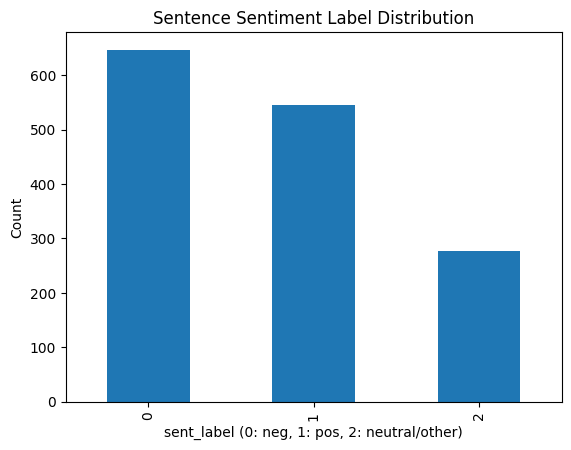

In [9]:
sent["sent_label"].value_counts().sort_index().plot(kind="bar")
plt.title("Sentence Sentiment Label Distribution")
plt.xlabel("sent_label (0: neg, 1: pos, 2: neutral/other)")
plt.ylabel("Count")
plt.show()

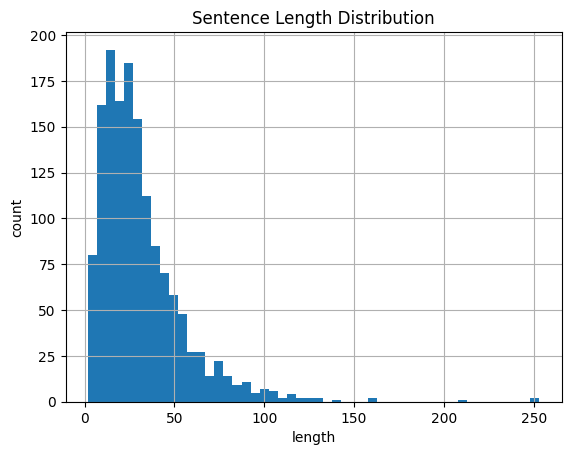

In [10]:
sent["sentence_len"].hist(bins=50)
plt.title("Sentence Length Distribution")
plt.xlabel("length")
plt.ylabel("count")
plt.show()

#### 중복 데이터 검사

In [11]:
kr3.isna().sum()
sent.isna().sum()

kr3.duplicated(subset=["Review"]).sum()
sent.duplicated(subset=["sentence_text", "sent_label"]).sum()

np.int64(0)

## 3. 리뷰 단위/문장 단위 감정 분석 비교

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

sent_01 = sent[sent["sent_label"].isin([0, 1])].copy()

sent_01["is_neg"] = (sent_01["sent_label"] == 0)

review_level = (
    sent_01
    .groupby(["review_id", "doc_label"])["is_neg"]
    .agg(["mean", "count"])
    .reset_index()
)

review_level.rename(
    columns={"mean": "neg_ratio", "count": "num_sentences"},
    inplace=True,
)

### 리뷰별 부정 문장 비율의 사분위수(박스플롯)

/tmp/ipython-input-1154274693.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


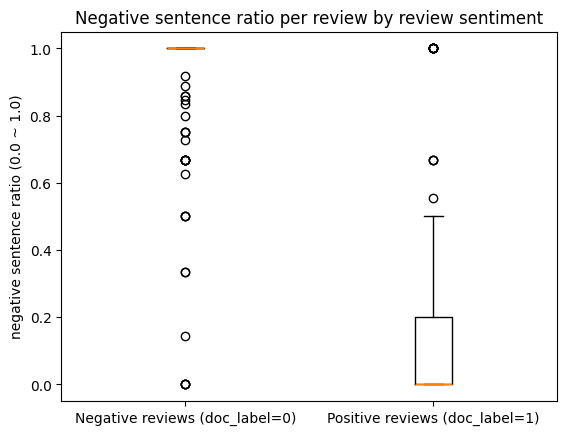

In [13]:
import matplotlib.pyplot as plt

neg_reviews = review_level[review_level["doc_label"] == 0]["neg_ratio"]
pos_reviews = review_level[review_level["doc_label"] == 1]["neg_ratio"]

plt.figure()

plt.boxplot(
    [neg_reviews, pos_reviews],
    labels=["Negative reviews (doc_label=0)",
            "Positive reviews (doc_label=1)"],
)

plt.title("Negative sentence ratio per review by review sentiment")
plt.ylabel("negative sentence ratio (0.0 ~ 1.0)")

plt.show()

### 리뷰별 부정 문장 비율 분포(히스토그램)

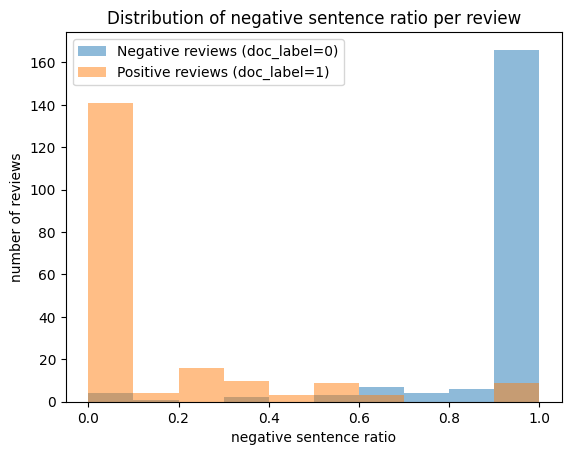

In [14]:
plt.figure()

neg_reviews = review_level[review_level["doc_label"] == 0]["neg_ratio"]
pos_reviews = review_level[review_level["doc_label"] == 1]["neg_ratio"]

plt.hist(
    neg_reviews,
    bins=10,
    alpha=0.5,
    label="Negative reviews (doc_label=0)",
)

plt.hist(
    pos_reviews,
    bins=10,
    alpha=0.5,
    label="Positive reviews (doc_label=1)",
)

plt.title("Distribution of negative sentence ratio per review")
plt.xlabel("negative sentence ratio")
plt.ylabel("number of reviews")
plt.legend()

plt.show()